## Imports

In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Downloading and Reading ARM's NetCDF Data
ARM's standard file format is NetCDF (network Common Data Form) which makes it very easy to work with in Python!  ARM data are available through a data portal called [Data Discovery](https://adc.arm.gov/discovery/#/) or through a webservice.  If you didn't get your username and token earlier, please go back and see the Prerequisites!

In [2]:
# Set your username and token here!
username = 'X'
token = 'X'

# Set the datastream and start/enddates
datastream = 'bnfsebsS20.b1'
startdate = '2025-03-31'
enddate = '2025-04-30T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_sebs = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] bnfsebsS20.b1.20250401.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250424.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250430.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250422.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250429.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250427.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250417.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250418.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250425.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250411.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250420.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250410.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250421.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250403.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250404.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250331.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250402.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250405.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250423.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250414.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250428.000

### Note: Did you notice the citation and DOI?

In [3]:
# Let's read in the data using ACT and check out the data
ds_sebs = act.io.read_arm_netcdf(result_sebs)

ds_sebs

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<xarray.Dataset> Size: 458kB
Dimensions:                        (time: 1488, bound: 2)
Coordinates:
  * time                           (time) datetime64[ns] 12kB 2025-03-31 ... ...
Dimensions without coordinates: bound
Data variables: (12/70)
    base_time                      (time) datetime64[ns] 12kB 2025-03-31 ... ...
    time_offset                    (time) datetime64[ns] 12kB 2025-03-31 ... ...
    time_bounds                    (time, bound) object 24kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    down_short_hemisp              (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_down_short_hemisp           (time) int32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    up_short_hemisp                (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                             ...
    qc_temp_net_radiometer         (time) int32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    battery_voltage                (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_battery_voltage             (time) int32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                            (time) float32 6kB 34.65 34.65 ... 34.65
    lon                            (time) float32 6kB -87.29 -87.29 ... -87.29
    alt                            (time) float32 6kB 178.0 178.0 ... 178.0
Attributes: (12/33)
    command_line:            sebs_ingest -s bnf -f S20 --max-runtime 0
    Conventions:             ARM-1.3
    process_version:         ingest-sebs-1.9-0.el9
    dod_version:             sebs-b1-1.6
    input_source:            /data/collection/bnf/bnfsebsS20.00/SEBS_Table30....
    site_id:                 bnf
    ...                      ...
    qc_bit_3_assessment:     Bad
    history:                 created by user armflowprod on machine prod-slur...
    _file_dates:             ['20250331', '20250401', '20250402', '20250403',...
    _file_times:             ['000000', '000000', '000000', '000000', '000000...
    _datastream:             bnfsebsS20.b1
    _arm_standards_flag:     1

## Quality Controlling Data

ARM has multiple methods that it uses to communicate data quality information out to the users.  One of these methods is through "embedded QC" variables.  These are variables within the file that have information on automated tests that have been applied.  Many times, they include Min, Max, and Delta tests but as is the case with the AOS instruments, there can be more complicated tests that are applied.

The results from all these different tests are stored in a single variable using bit-packed QC.  We won't get into the full details here, but it's a way to communicate the results of multiple tests in a single integer value by utilizing binary and bits!  You can learn more about bit-packed QC [here](https://code.arm.gov/docs/QC-flag-examples/-/wikis/home) but ACT also has many of the tools for working with ARM QC.

#### Other Sources of Quality Control
ARM also communicates problems with the data quality through Data Quality Reports (DQR).  These reports are normally submitted by the instrument mentor when there's been a problem with the instrument.  The categories include:

- **Data Quality Report Categories**
    - Missing: Data are not available or set to -9999
    - Suspect: The data are not fully incorrect but there are problems that increases the uncertainty of the values. Data should be used with caution.
    - Bad: The data are incorrect and should not be used.
    - Note: Data notes are a way to communicate information that would be useful to the end user but does not rise to the level of suspect or bad data
    
Additionally, data quality information can be found in the Instrument Handbooks, which are included on most instrument pages.  Here is an [example](https://www.arm.gov/publications/tech_reports/handbooks/met_handbook.pdf) of the MET handbook.

In [4]:
ds_sebs.clean.cleanup()

variable = 'soil_temp_1'

<Axes: >

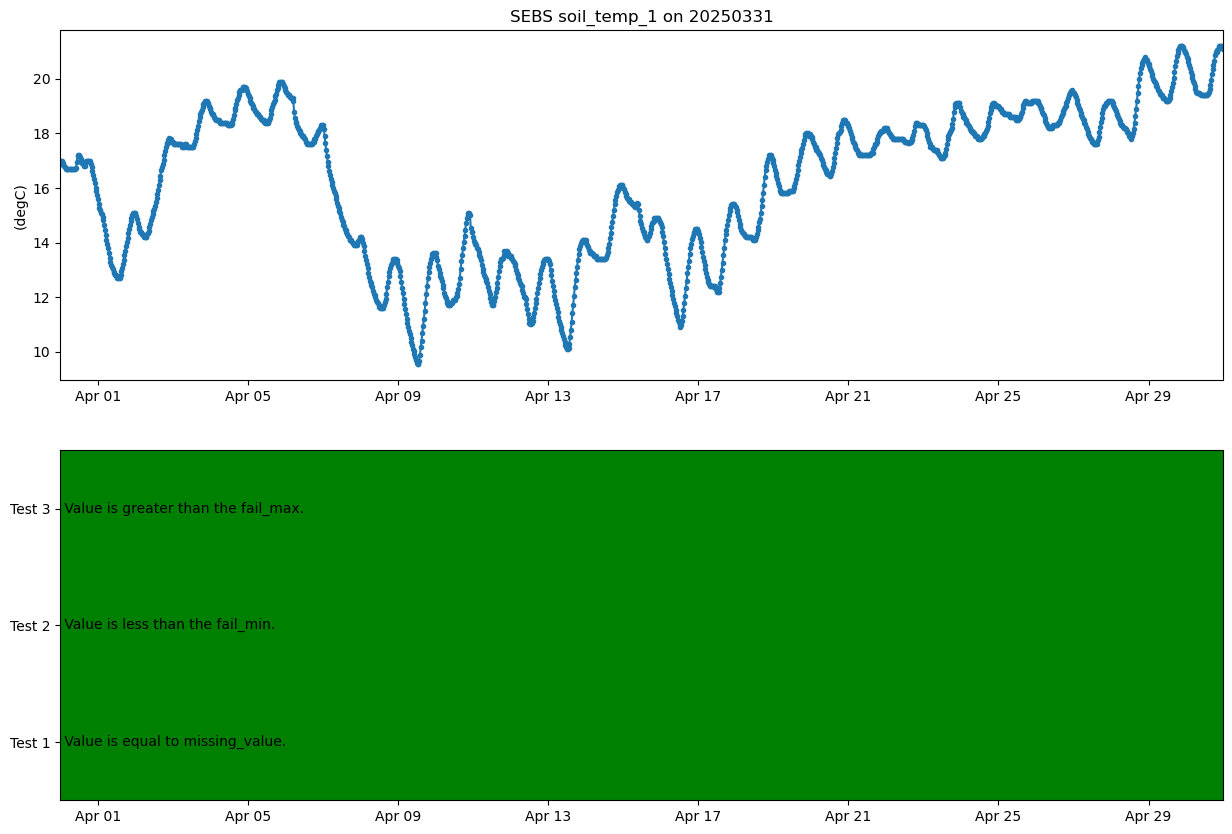

In [5]:
display = act.plotting.TimeSeriesDisplay({'SEBS': ds_sebs}, figsize=(15, 10), subplot_shape=(2,))
display.plot(variable, dsname='SEBS')

display.qc_flag_block_plot(variable, subplot_index=(1,))

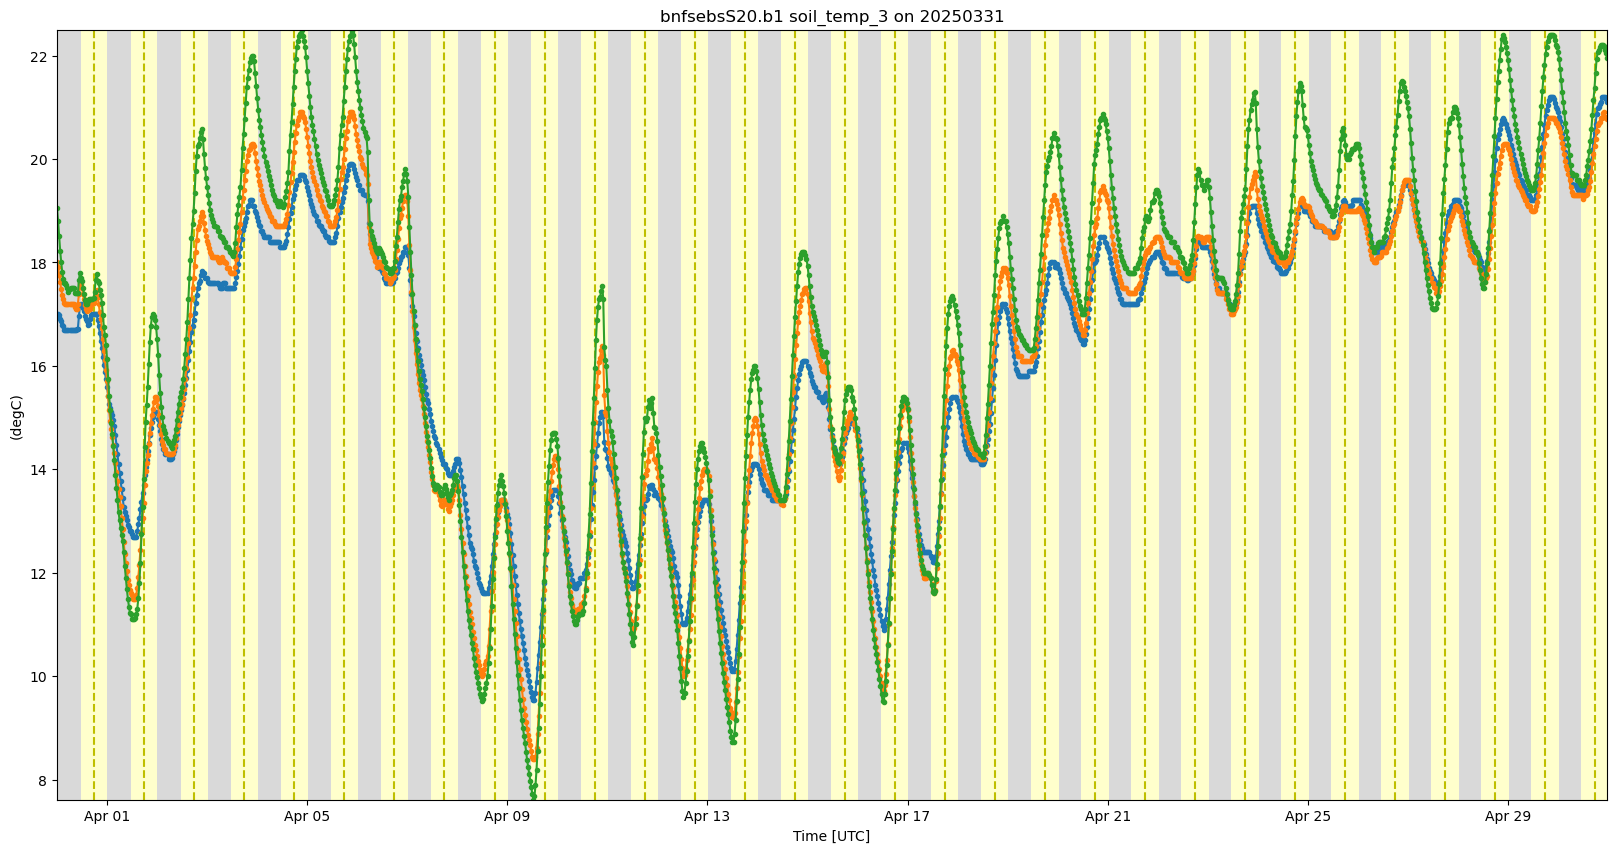

In [46]:
display = act.plotting.TimeSeriesDisplay(ds_sebs, figsize=(20, 10), subplot_shape=(1,))

# Plot up variables in the first plot
display.plot('soil_temp_1', subplot_index=(0,))
display.plot('soil_temp_2', subplot_index=(0,))
display.plot('soil_temp_3', subplot_index=(0,))

# display.qc_flag_block_plot(variable, subplot_index=(1,))
# display.qc_flag_block_plot('soil_temp_2', subplot_index=(2,))
# display.qc_flag_block_plot('soil_temp_3', subplot_index=(3,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

plt.show()

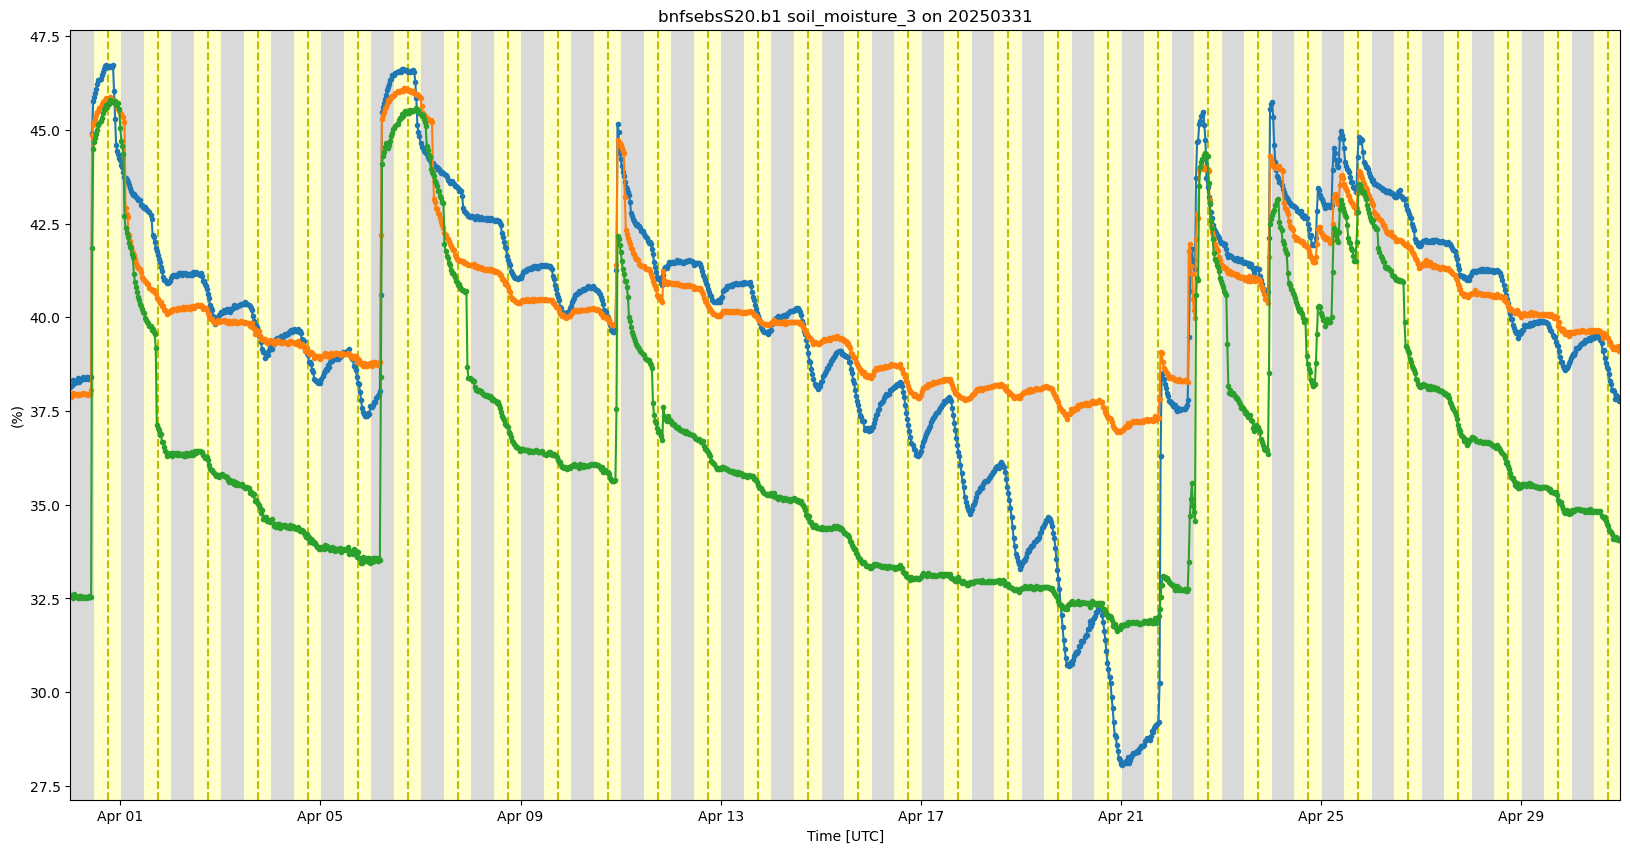

In [47]:
display = act.plotting.TimeSeriesDisplay(ds_sebs, figsize=(20, 10), subplot_shape=(1,))

# Plot up variables in the first plot
display.plot('soil_moisture_1', subplot_index=(0,))
display.plot('soil_moisture_2', subplot_index=(0,))
display.plot('soil_moisture_3', subplot_index=(0,))

# display.qc_flag_block_plot('soil_moisture_1', subplot_index=(1,))
# display.qc_flag_block_plot('soil_moisture_2', subplot_index=(2,))
# display.qc_flag_block_plot('soil_moisture_3', subplot_index=(3,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

plt.show()

# Correlation with MET dataset tbrg_precip_total_corr

In [27]:
list(ds_sebs.variables)

['base_time',
 'time_offset',
 'time_bounds',
 'down_short_hemisp',
 'qc_down_short_hemisp',
 'up_short_hemisp',
 'qc_up_short_hemisp',
 'down_long',
 'qc_down_long',
 'up_long',
 'qc_up_long',
 'surface_soil_heat_flux_1',
 'qc_surface_soil_heat_flux_1',
 'surface_soil_heat_flux_2',
 'qc_surface_soil_heat_flux_2',
 'surface_soil_heat_flux_3',
 'qc_surface_soil_heat_flux_3',
 'soil_moisture_1',
 'qc_soil_moisture_1',
 'soil_moisture_2',
 'qc_soil_moisture_2',
 'soil_moisture_3',
 'qc_soil_moisture_3',
 'soil_temp_1',
 'qc_soil_temp_1',
 'soil_temp_2',
 'qc_soil_temp_2',
 'soil_temp_3',
 'qc_soil_temp_3',
 'soil_heat_flow_1',
 'qc_soil_heat_flow_1',
 'soil_heat_flow_2',
 'qc_soil_heat_flow_2',
 'soil_heat_flow_3',
 'qc_soil_heat_flow_3',
 'corr_soil_heat_flow_1',
 'qc_corr_soil_heat_flow_1',
 'corr_soil_heat_flow_2',
 'qc_corr_soil_heat_flow_2',
 'corr_soil_heat_flow_3',
 'qc_corr_soil_heat_flow_3',
 'soil_heat_capacity_1',
 'qc_soil_heat_capacity_1',
 'soil_heat_capacity_2',
 'qc_soil_h

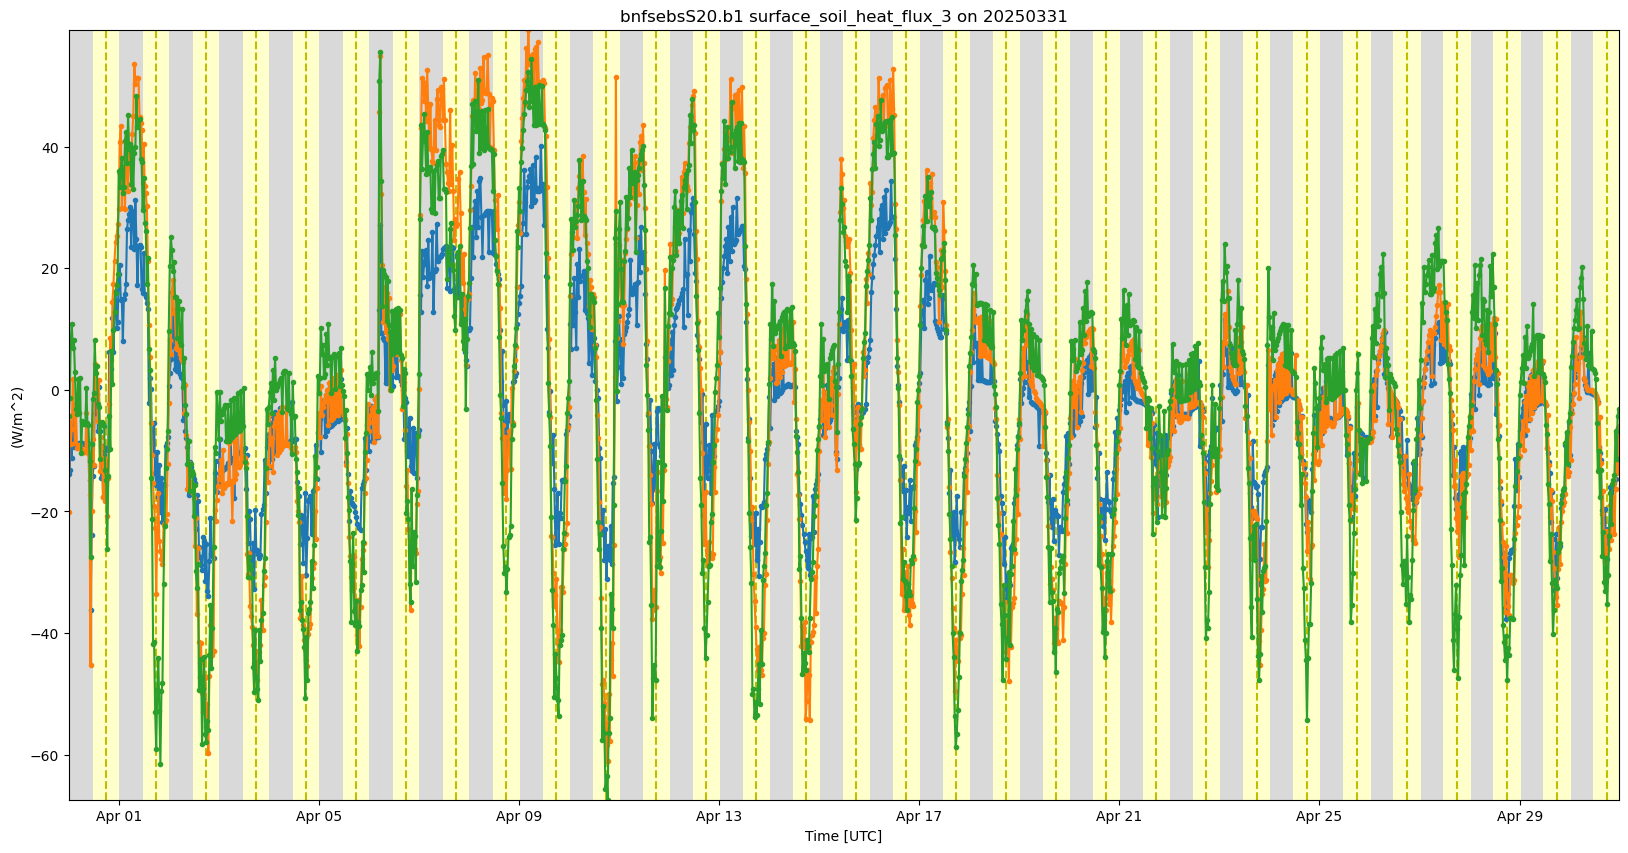

In [33]:
display = act.plotting.TimeSeriesDisplay(ds_sebs, figsize=(20, 10), subplot_shape=(1,))

# Plot up variables in the first plot
display.plot('surface_soil_heat_flux_1', subplot_index=(0,))
display.plot('surface_soil_heat_flux_2', subplot_index=(0,))
display.plot('surface_soil_heat_flux_3', subplot_index=(0,))

# display.qc_flag_block_plot('surface_soil_heat_flux_1', subplot_index=(1,))
# display.qc_flag_block_plot('surface_soil_heat_flux_2', subplot_index=(2,))
# display.qc_flag_block_plot('surface_soil_heat_flux_3', subplot_index=(3,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

plt.show()

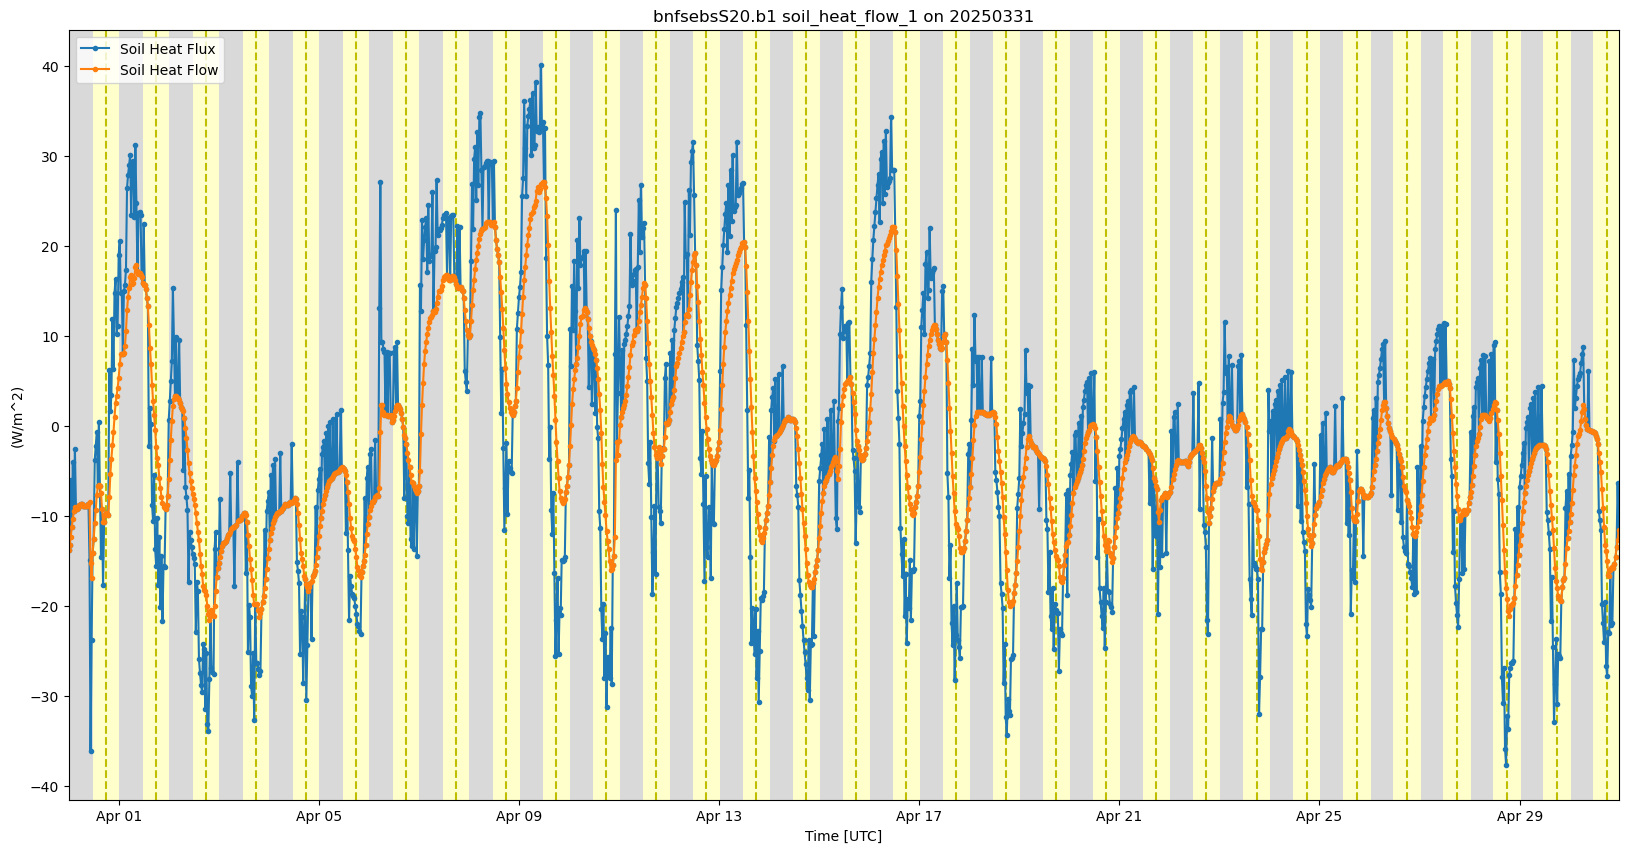

In [41]:
display = act.plotting.TimeSeriesDisplay(ds_sebs, figsize=(20, 10), subplot_shape=(1,))

# Plot up variables in the first plot
display.plot('surface_soil_heat_flux_1', subplot_index=(0,), label='Soil Heat Flux')
display.plot('soil_heat_flow_1', subplot_index=(0,), label='Soil Heat Flow')

# display.qc_flag_block_plot('surface_soil_heat_flux_1', subplot_index=(1,))
# display.qc_flag_block_plot('surface_soil_heat_flux_2', subplot_index=(2,))
# display.qc_flag_block_plot('surface_soil_heat_flux_3', subplot_index=(3,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

plt.legend()
plt.show()

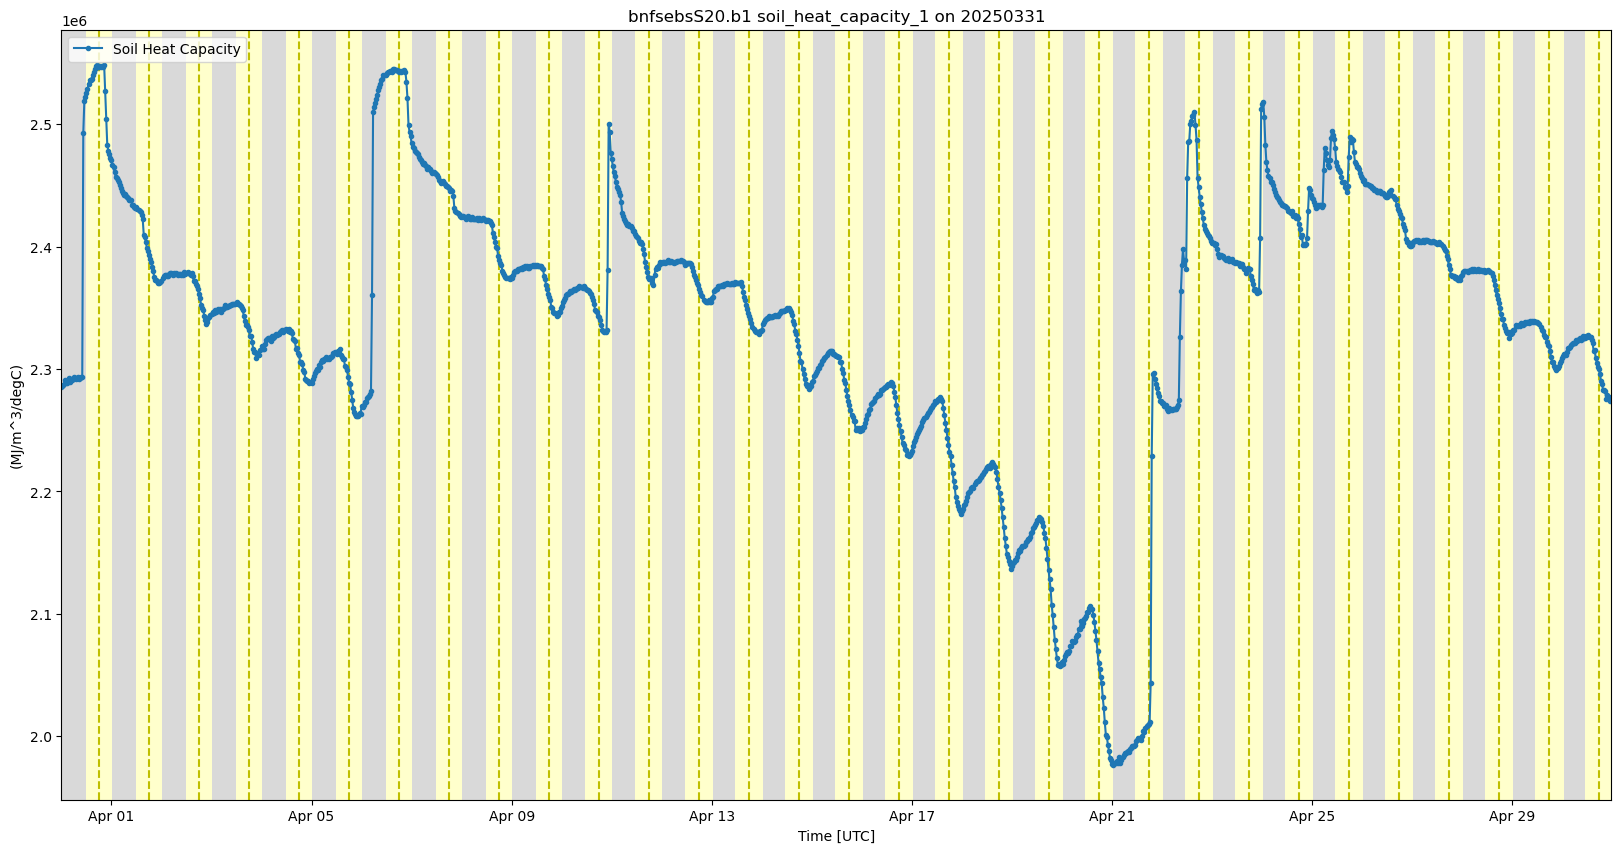

In [42]:
display = act.plotting.TimeSeriesDisplay(ds_sebs, figsize=(20, 10), subplot_shape=(1,))

# Plot up variables in the first plot
display.plot('soil_heat_capacity_1', subplot_index=(0,), label='Soil Heat Capacity')

# display.qc_flag_block_plot('surface_soil_heat_flux_1', subplot_index=(1,))
# display.qc_flag_block_plot('surface_soil_heat_flux_2', subplot_index=(2,))
# display.qc_flag_block_plot('surface_soil_heat_flux_3', subplot_index=(3,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

plt.legend()
plt.show()